In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.cluster import KMeans
from collections import Counter
from itertools import product
from bioinfokit.visuz import cluster
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from statsmodels.graphics.mosaicplot import mosaic
import math
import warnings
warnings.filterwarnings('ignore')

In [2]:
data1 = pd.read_csv('mcdonalds.csv')

In [3]:
data1.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [4]:
data1.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [6]:
data1.shape

(1453, 15)

In [7]:
data1.nunique()

yummy              2
convenient         2
spicy              2
fattening          2
greasy             2
fast               2
cheap              2
tasty              2
expensive          2
healthy            2
disgusting         2
Like              11
Age               54
VisitFrequency     6
Gender             2
dtype: int64

In [8]:
# getting the value counts of 'Like'
data1['Like'].value_counts()

Like
+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: count, dtype: int64

In [9]:
# getting the value counts of 'Age'
data1['Age'].value_counts()

Age
55    53
60    38
37    37
59    36
57    36
52    36
58    35
36    35
49    34
62    34
50    34
32    33
44    32
56    32
64    32
53    31
26    31
24    30
35    30
51    30
47    30
42    30
23    30
39    29
29    28
34    28
30    28
38    27
40    27
31    27
25    26
33    26
61    26
67    26
48    26
43    25
27    25
63    25
54    24
41    23
22    23
65    23
45    22
20    21
46    19
28    18
66    17
21    16
18    16
70    15
69    14
68    13
19    10
71     1
Name: count, dtype: int64

In [10]:
# getting the value counts of 'VisitFrequency'
data1['VisitFrequency'].value_counts()

VisitFrequency
Once a month             439
Every three months       342
Once a year              252
Once a week              235
Never                    131
More than once a week     54
Name: count, dtype: int64

In [11]:
# getting the value counts of 'Gender'
data1['Gender'].value_counts()
     

Gender
Female    788
Male      665
Name: count, dtype: int64

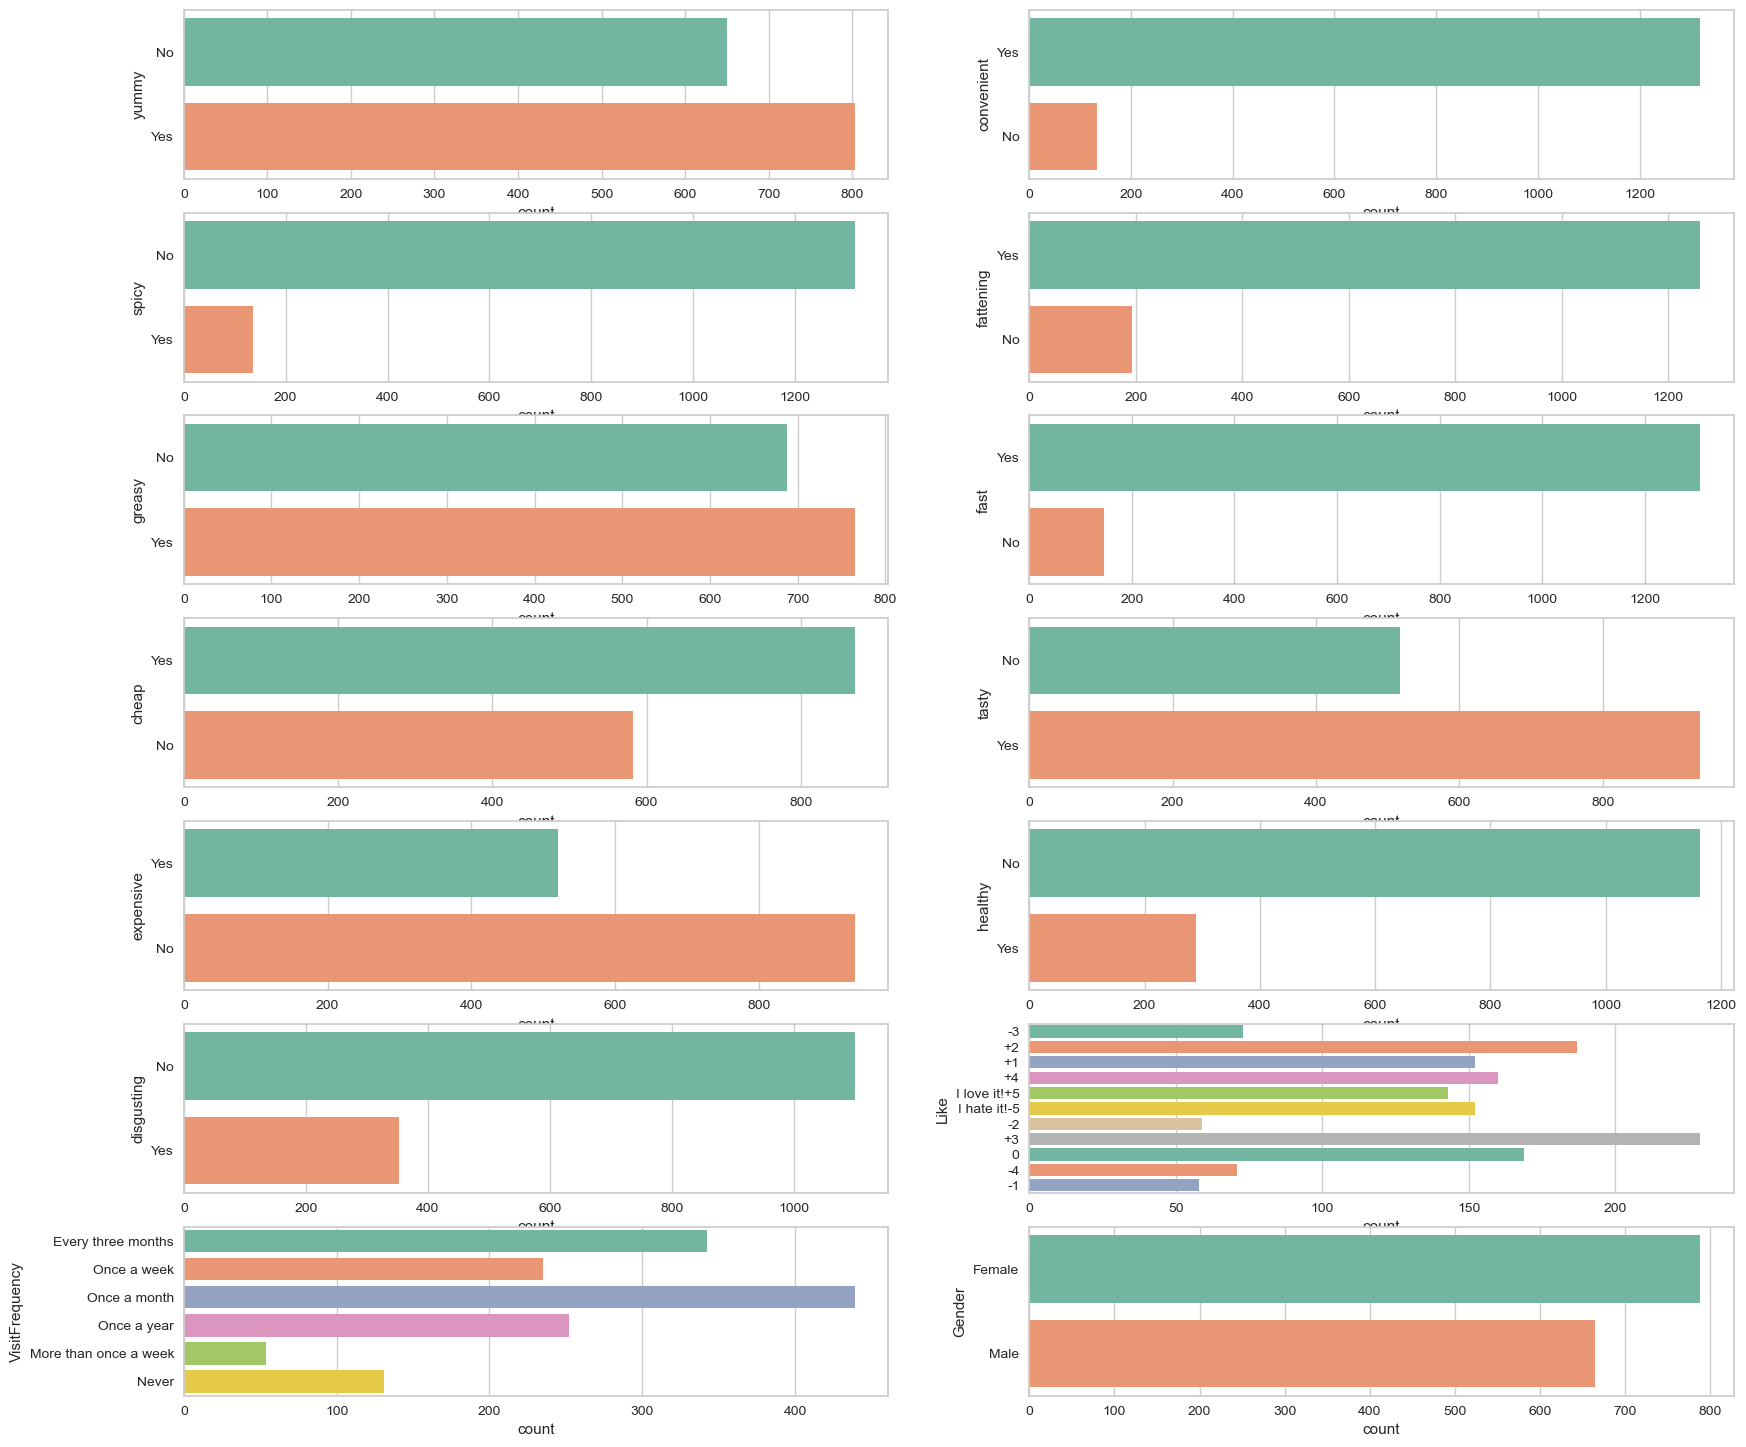

In [12]:
fig, ax = plt.subplots(7, 2, figsize = (20,18))
_=sns.countplot(data1['yummy'], ax=ax[0,0], palette='Set2')
_=sns.countplot(data1['convenient'], ax=ax[0,1], palette='Set2')
_=sns.countplot(data1['spicy'], ax=ax[1,0], palette='Set2')
_=sns.countplot(data1['fattening'], ax=ax[1,1], palette='Set2')
_=sns.countplot(data1['greasy'], ax=ax[2,0], palette='Set2')
_=sns.countplot(data1['fast'], ax=ax[2,1], palette='Set2')
_=sns.countplot(data1['cheap'], ax=ax[3,0], palette='Set2')
_=sns.countplot(data1['tasty'], ax=ax[3,1], palette='Set2')
_=sns.countplot(data1['expensive'], ax=ax[4,0], palette='Set2')
_=sns.countplot(data1['healthy'], ax=ax[4,1], palette='Set2')
_=sns.countplot(data1['disgusting'], ax=ax[5,0], palette='Set2')
_=sns.countplot(data1['Like'], ax=ax[5,1], palette='Set2')
_=sns.countplot(data1['VisitFrequency'], ax=ax[6,0], palette='Set2')
_=sns.countplot(data1['Gender'], ax=ax[6,1], palette='Set2')


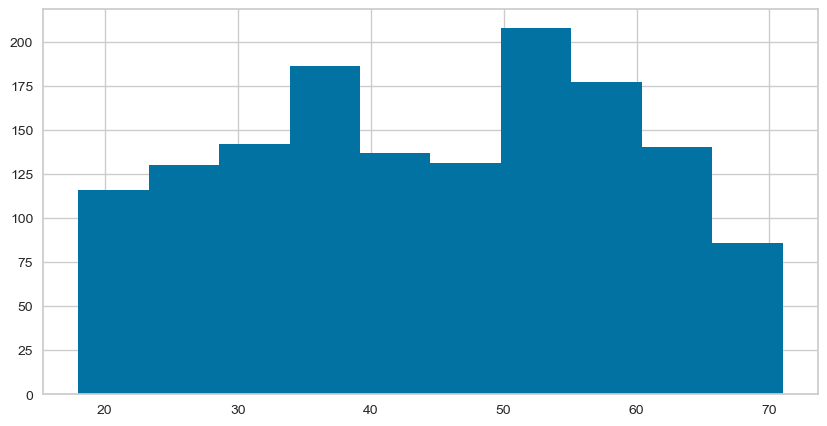

In [13]:
#univariate analysis of numerical columns - continuous variables -
data1['Age'].hist(figsize=(10,5))
plt.show()

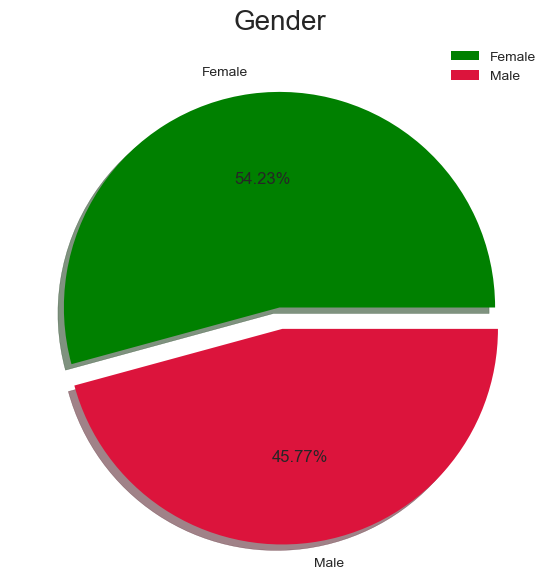

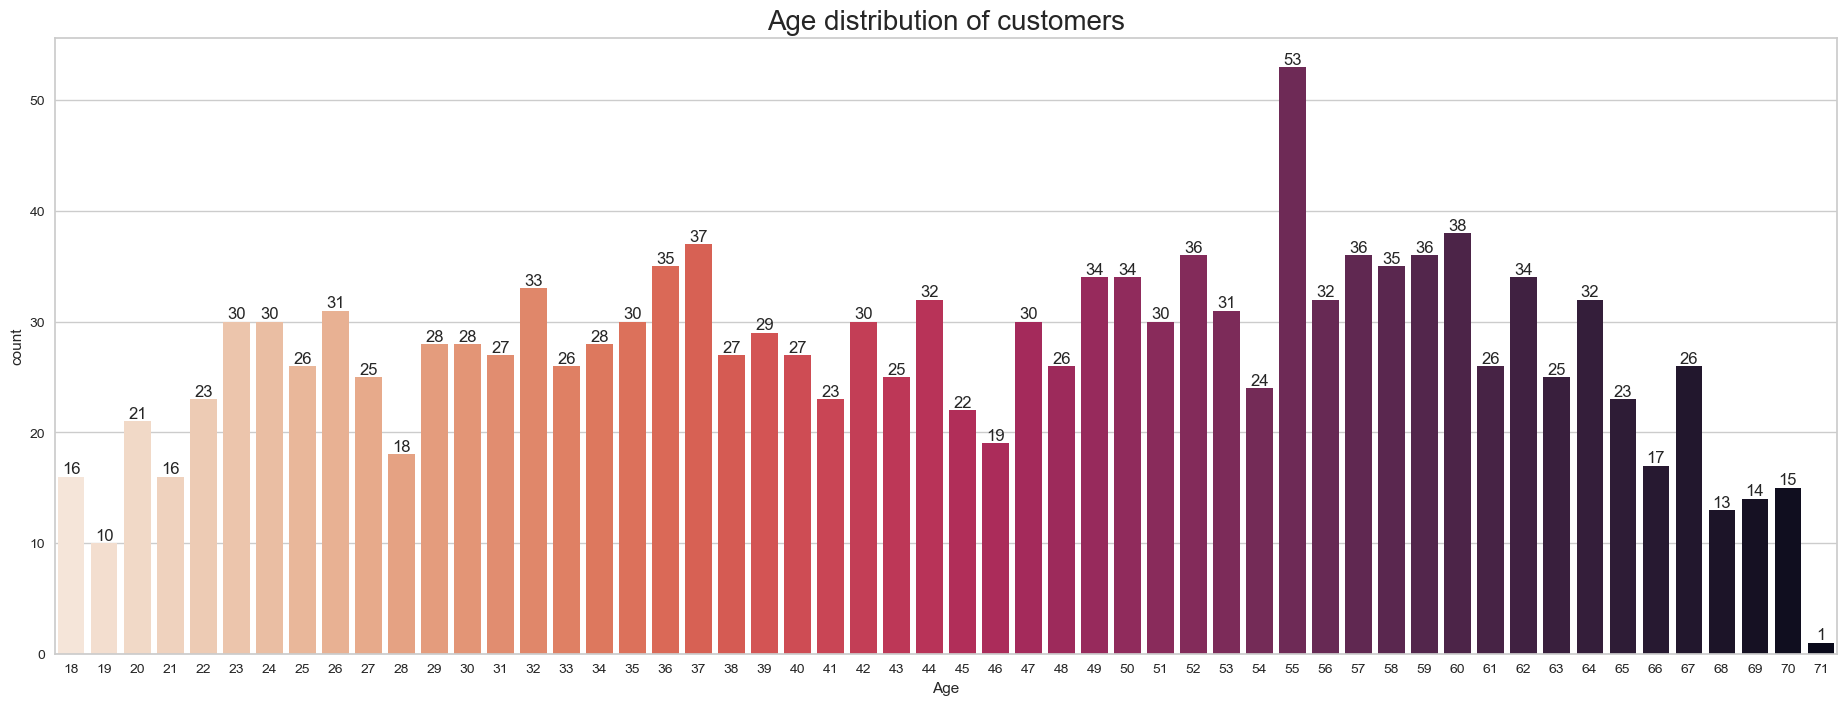

In [14]:
# Demographic segmentation using 'Age' & 'Gender'

# Gender: we infer that there are more female customers than male
labels = ['Female', 'Male']
size =data1['Gender'].value_counts()
colors = ['green', 'crimson']
explode = [0, 0.1]
plt.rcParams['figure.figsize'] = (7, 7)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

# Age: Mcdonalds recieve more customers of age between 50-60 and 35-40
plt.rcParams['figure.figsize'] = (23, 8)
data3 = sns.countplot(x=data1['Age'], palette = 'rocket_r')
# Add bar labels
for container in data3.containers:
    data3.bar_label(container)
plt.title('Age distribution of customers', fontsize = 20)
plt.show()

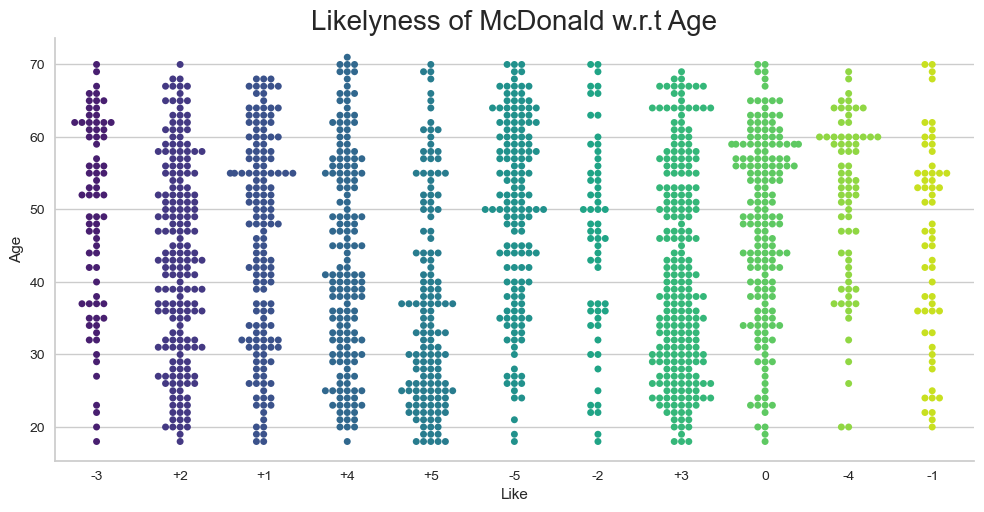

In [15]:
# Pyschographic segmentation using 'Like'

# renaming the category for convinence 
data1['Like'] = data1['Like'].replace({'I hate it!-5': '-5','I love it!+5':'+5'})

# plotting the results
sns.catplot(data=data1, x="Like", y="Age", orient="v", height=5, aspect=2, palette="viridis",kind="swarm")
plt.title('Likelyness of McDonald w.r.t Age', fontsize=20)
plt.show()

Preprocessing

In [17]:
#drop target variables
data = data1.drop(labels=['Like','Age','VisitFrequency','Gender'], axis=1) 
data     

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No


In [18]:
#replace the values "Yes" with 1 and "No" with 0 
data=data.iloc[:,0:11].replace("Yes",1).replace("No",0)
data

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


In [19]:
## Calculate the column means and round them to 2 decimal places
data2 = data.mean().round(2)
data2

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64

Applying PCA

In [21]:
# Create a PCA (Principal Component Analysis) object without specifying the number of components.
# The default behavior is to retain all components for the given data.
pca_data = preprocessing.scale(data)
pca = PCA(n_components=11)
pc = pca.fit_transform(pca_data)
names = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11']
pf = pd.DataFrame(data = pc, columns = names)
pf.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,0.704334,-0.437016,0.268698,-0.872074,-1.521184,0.470160,-0.030969,-0.687116,0.367598,0.321161,1.701170
1,-0.467820,0.364277,-1.596835,-0.004835,0.462385,-0.449321,0.087351,0.446003,0.221855,0.191268,1.467681
2,0.191986,1.712949,-0.339413,3.368168,-1.266802,0.148058,-0.606634,-0.668576,1.377226,-1.259300,-0.128530
3,-0.116991,-1.155122,-1.003913,0.469589,1.141750,-0.857182,0.015843,0.390275,-1.578539,0.092189,-0.233201
4,-0.034724,-1.390267,0.792275,0.473031,-0.270488,-0.847963,-1.804085,-0.700019,1.630339,0.092449,-0.033144


In [22]:
# Summary of PCA
# Fit PCA on the DataFrame 'data' again to obtain additional information like explained variance.
# Note that this step is not necessary for obtaining the transformed data (pc).
# Calculate the square root of the explained variance (eigenvalues) obtained from PCA.
# These are the standard deviations of the principal components.
# Calculate the proportion of variance explained by each principal component.
# Proportion of Variance contains the percentage of variance explained by each component.

explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)
std_deviation = np.sqrt(pca.explained_variance_)
print("Standard Deviation by Component:")
print(std_deviation)
print("Explained Variance by Component:")
print(explained_variance)
print("\nCumulative Explained Variance:")
print(cumulative_explained_variance)

Standard Deviation by Component:
[1.67724959 1.27786842 1.17520657 1.04005349 0.95861964 0.88461278
 0.84577406 0.76987039 0.72406476 0.55480943 0.50698253]
Explained Variance by Component:
[0.25556637 0.14834762 0.12546909 0.09826971 0.08348356 0.07109102
 0.06498559 0.05384477 0.04762809 0.02796379 0.0233504 ]

Cumulative Explained Variance:
[0.25556637 0.40391399 0.52938308 0.62765279 0.71113635 0.78222737
 0.84721295 0.90105773 0.94868581 0.9766496  1.        ]


In [23]:
# Print the standard deviation of each principal component.
# The 'round(1)' function rounds the standard deviation values to one decimal place.
print("Standard Deviation:\n",std_deviation.round(1))
data_p=pca.fit(pca_data)
# correlation coefficient between original variables and the component
loadings = pca.components_
num_pc = pca.n_components_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['feature'] = data.columns.values
loadings_df = loadings_df.set_index('feature')
loadings_df=round(-loadings_df,3)
loadings_df

# The resulting 'loadings_df' DataFrame contains the loadings of each original feature on each principal component.
# It provides insight into which features contribute most to each principal component.

Standard Deviation:
 [1.7 1.3 1.2 1.  1.  0.9 0.8 0.8 0.7 0.6 0.5]


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
feature,,,,,,,,,,,
yummy,0.407,-0.283,0.260,-0.026,-0.347,0.125,-0.160,-0.017,0.195,-0.691,0.092
convenient,0.309,0.046,0.317,0.009,0.437,-0.189,0.662,-0.150,0.337,-0.029,-0.021
spicy,0.023,-0.070,-0.020,-0.845,0.186,-0.439,-0.214,0.028,-0.025,-0.058,0.042
fattening,-0.178,0.206,0.608,0.023,-0.087,-0.108,0.024,0.720,-0.105,0.020,0.075
greasy,-0.268,0.136,0.390,-0.331,-0.344,0.278,0.307,-0.487,-0.346,0.015,0.031
fast,0.213,0.282,0.211,-0.090,0.569,0.573,-0.392,-0.056,-0.099,-0.018,0.054
cheap,0.289,0.575,-0.125,-0.114,-0.257,-0.021,0.009,0.065,0.062,-0.060,-0.692
tasty,0.426,-0.242,0.270,-0.073,-0.286,0.053,-0.197,-0.059,0.214,0.713,-0.006
expensive,-0.291,-0.568,0.183,-0.036,0.207,0.171,-0.015,0.062,0.010,-0.030,-0.694


In [24]:
index=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11']
rot_matrix = data_p.components_.T
rot_df = pd.DataFrame(rot_matrix, index=data.columns.values, columns=index)
rot_df=round(-rot_df,3)
rot_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
yummy,0.407,-0.283,0.260,-0.026,-0.347,0.125,-0.160,-0.017,0.195,-0.691,0.092
convenient,0.309,0.046,0.317,0.009,0.437,-0.189,0.662,-0.150,0.337,-0.029,-0.021
spicy,0.023,-0.070,-0.020,-0.845,0.186,-0.439,-0.214,0.028,-0.025,-0.058,0.042
fattening,-0.178,0.206,0.608,0.023,-0.087,-0.108,0.024,0.720,-0.105,0.020,0.075
greasy,-0.268,0.136,0.390,-0.331,-0.344,0.278,0.307,-0.487,-0.346,0.015,0.031
fast,0.213,0.282,0.211,-0.090,0.569,0.573,-0.392,-0.056,-0.099,-0.018,0.054
cheap,0.289,0.575,-0.125,-0.114,-0.257,-0.021,0.009,0.065,0.062,-0.060,-0.692
tasty,0.426,-0.242,0.270,-0.073,-0.286,0.053,-0.197,-0.059,0.214,0.713,-0.006
expensive,-0.291,-0.568,0.183,-0.036,0.207,0.171,-0.015,0.062,0.010,-0.030,-0.694
healthy,0.267,-0.201,-0.368,-0.302,-0.052,0.446,0.449,0.446,-0.219,0.055,0.090


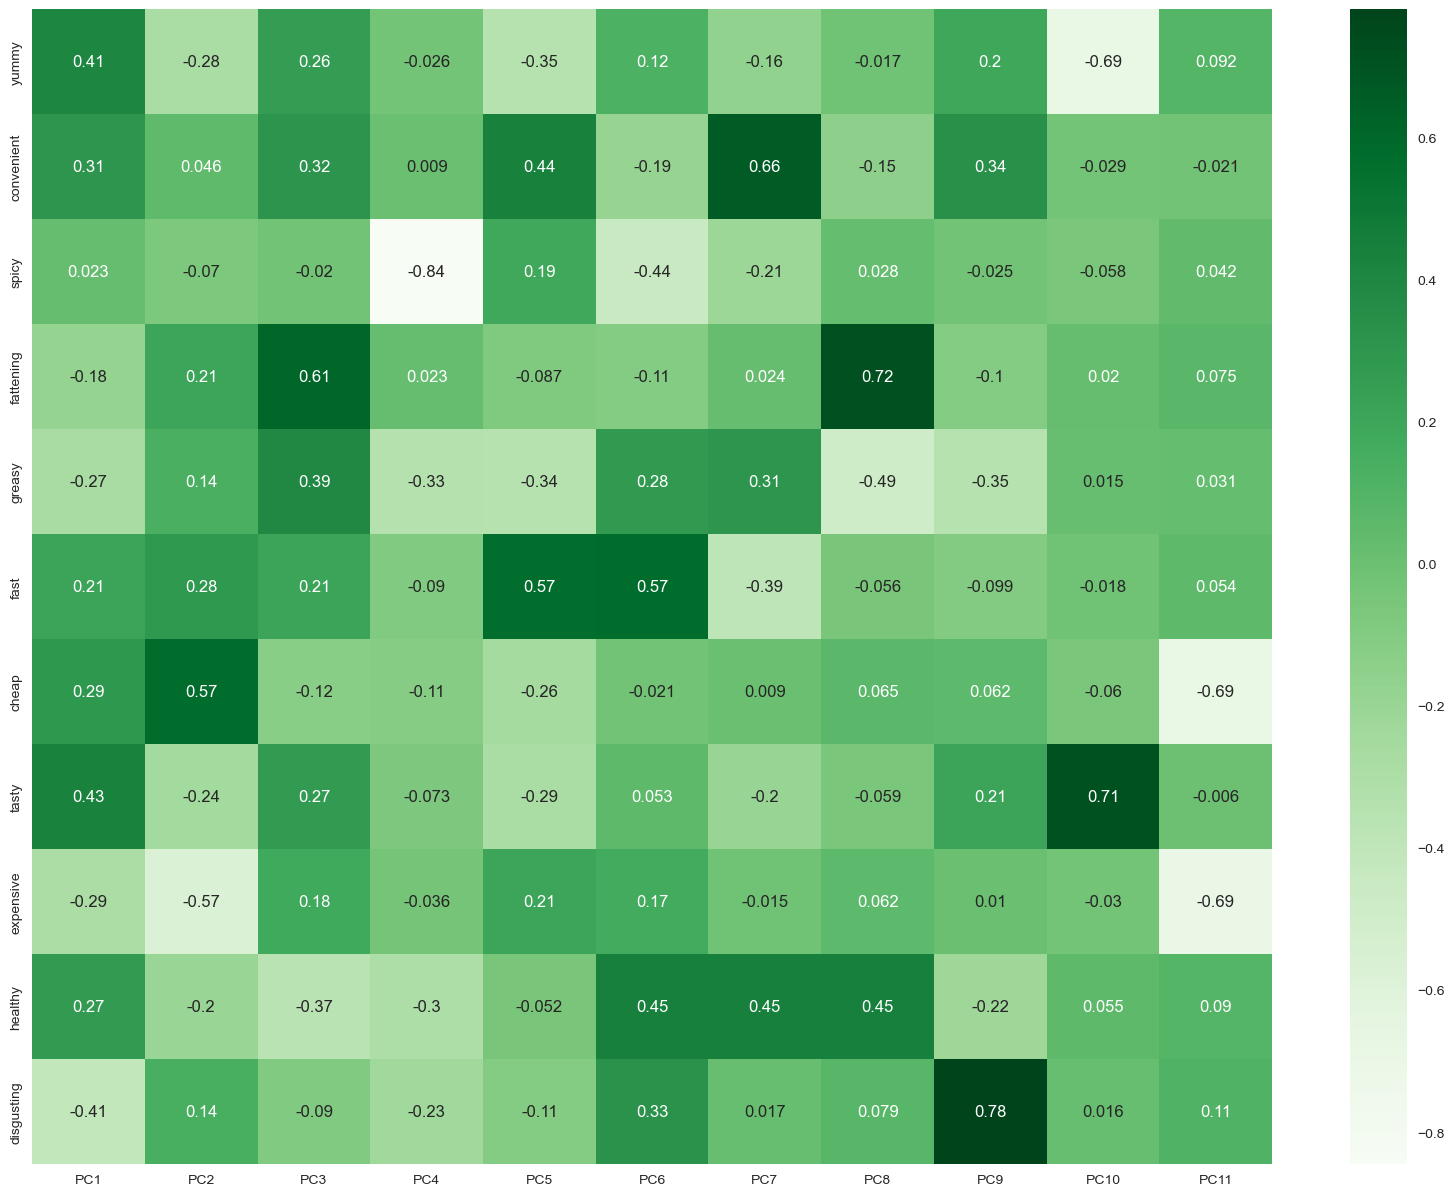

In [25]:
# correlation matrix plot for loadings 
plt.rcParams['figure.figsize'] = (20,15)
ax = sns.heatmap(rot_df, annot=True, cmap='Greens')
plt.show()

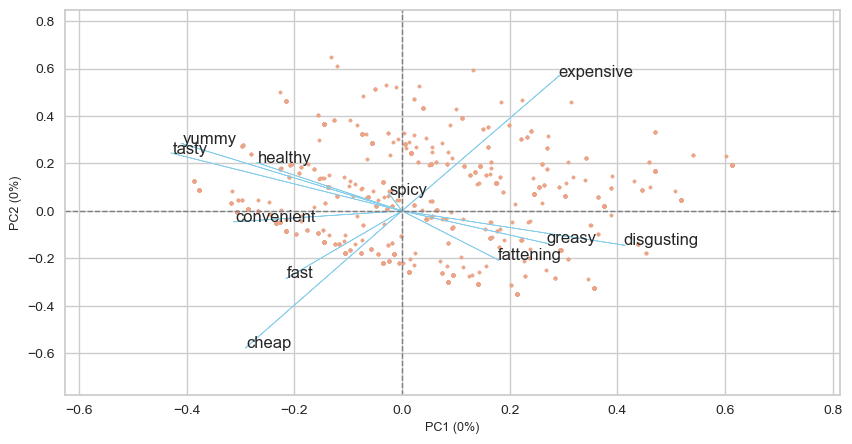

In [26]:
# get PC scores
pca_scores = pc

# get 2D biplot
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=data.columns.values, var1=0,var2=0,show=True,dim=(10,5))

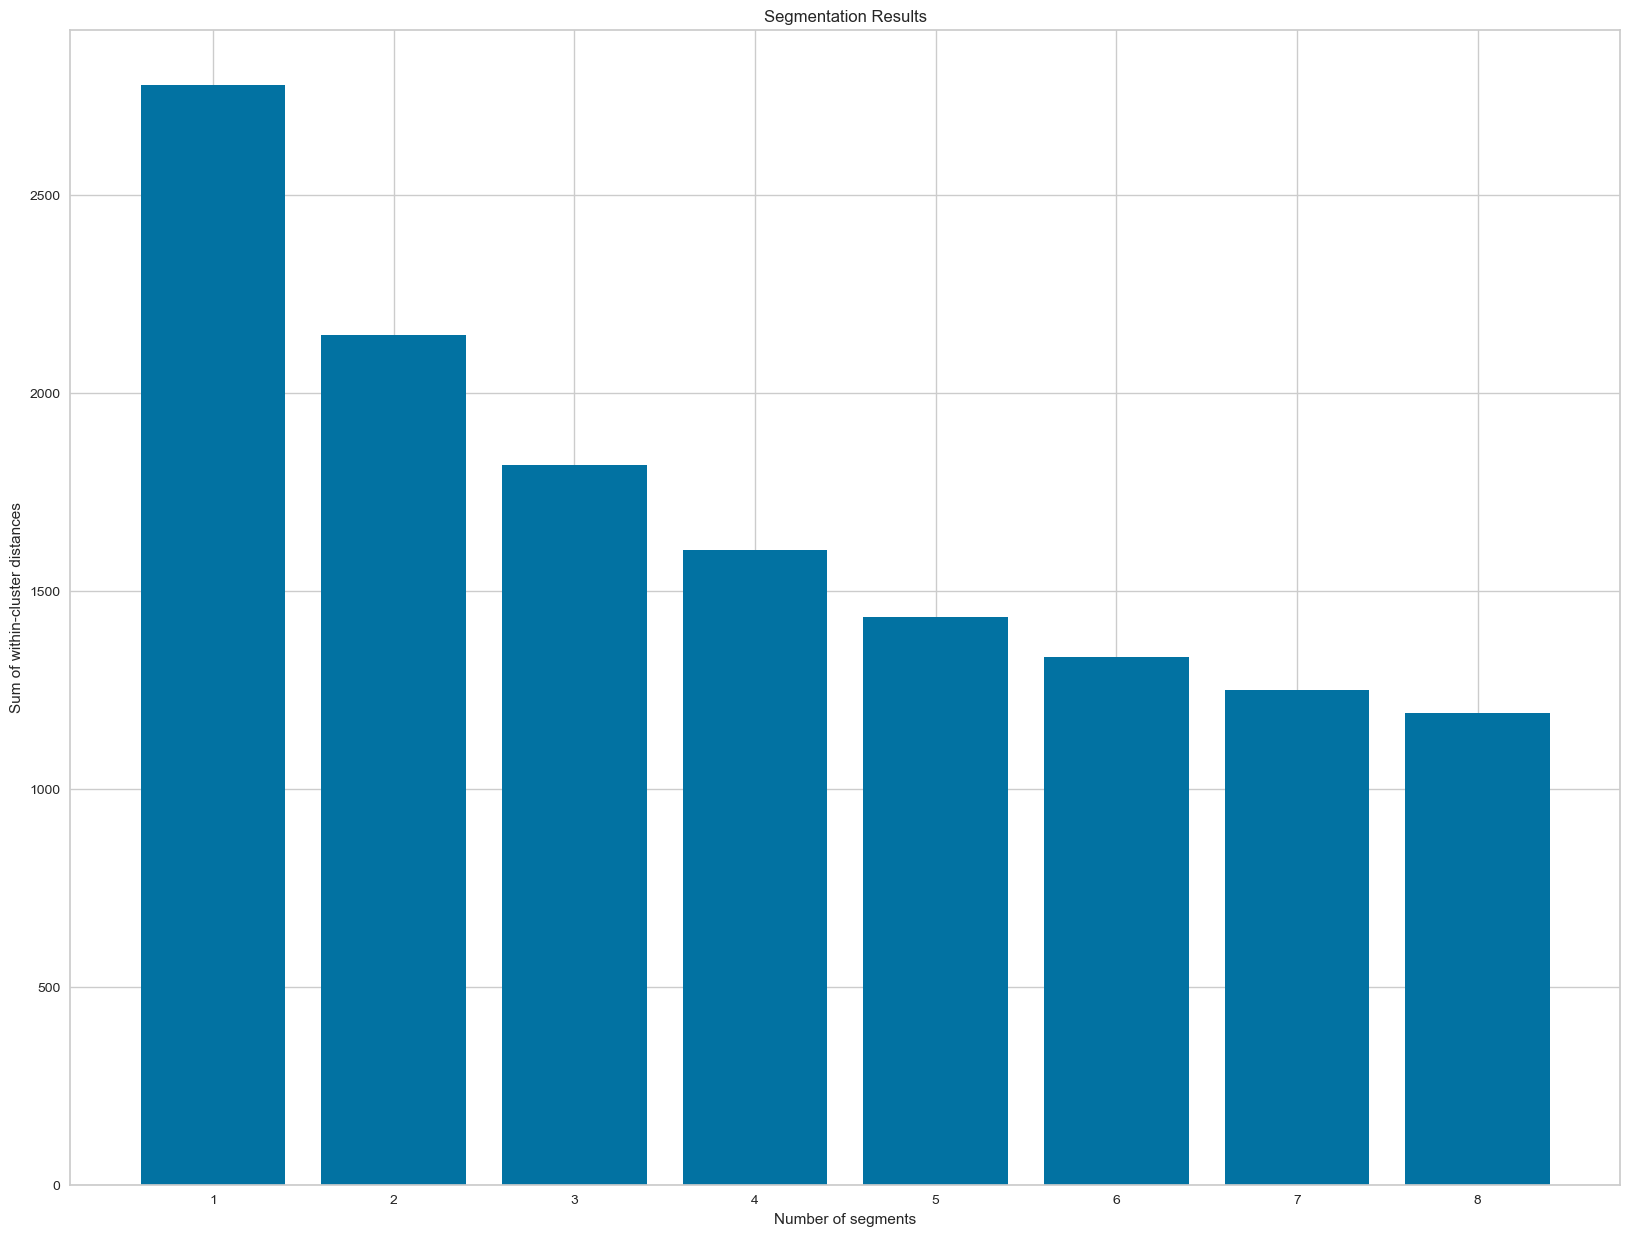

In [27]:
# Set a seed value to make the random number generation reproducible.
# This ensures that the same random numbers are generated every time the code is run with the same seed.
np.random.seed(1234)
# Define the number of repetitions for the KMeans clustering algorithm.
nrep = 10
# Define the range of the number of clusters to test (from 1 to 8, excluding 9).
num_segments = range(1, 9)
# Create an empty list to store the sum of within-cluster distances for each number of clusters.
within_cluster_distances = []
# Create an empty dictionary to store the KMeans models for different numbers of clusters.
# The keys of the dictionary will be strings representing the number of clusters (e.g., "1", "2", "3", ...).
data_km28 = {}
# Iterate over each value in the 'num_segments' range to perform KMeans clustering for different numbers of clusters.
for k in num_segments:
  # Create a KMeans object with 'k' clusters, 'n_init' repetitions, and a fixed random seed for reproducibility.
    kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)
    # Fit the KMeans model on the original DataFrame 'data'.
    kmeans.fit(data)
    # Calculate and store the sum of within-cluster distances (inertia) for the current number of clusters.
    within_cluster_distances.append((kmeans.inertia_))
    # Store the KMeans model in the 'data_km28' dictionary, indexed by the number of clusters.
    data_km28[str(k)] = kmeans

# Create a bar plot to visualize the sum of within-cluster distances for different numbers of clusters.
plt.bar(num_segments, within_cluster_distances)
# Add labels and a title to the plot for better interpretation.
plt.xlabel("Number of segments")
plt.ylabel("Sum of within-cluster distances")
plt.title("Segmentation Results")
# Display the plot showing the relationship between the number of clusters and within-cluster distances.
plt.show()

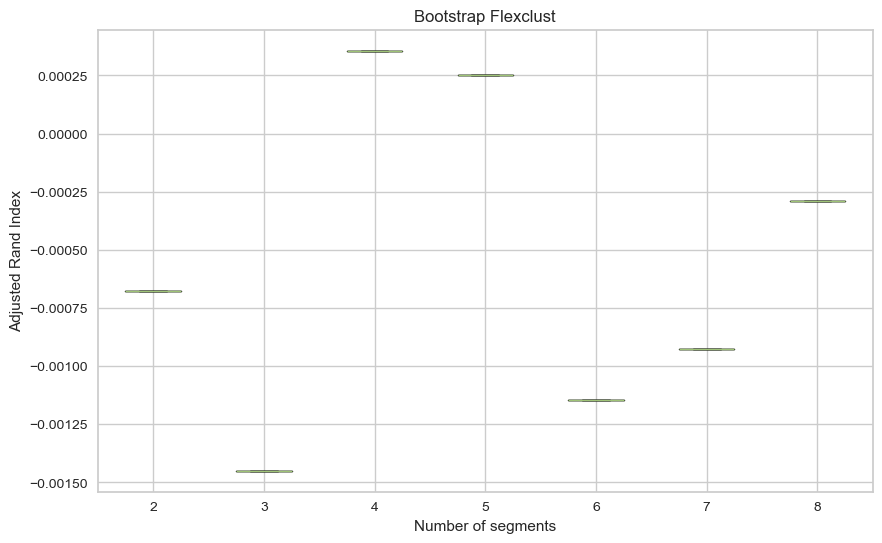

In [28]:
# Set a seed value to make the random number generation reproducible.
# This ensures that the same random numbers are generated every time the code is run with the same seed.
# Import the 'resample' function from scikit-learn's utility module
# This function is used for bootstrapping or resampling data
from sklearn.utils import resample
# Import the 'adjusted_rand_score' function from scikit-learn's metrics module
# This function computes the Adjusted Rand Index, which is a measure of clustering similarity
from sklearn.metrics import adjusted_rand_score
np.random.seed(1234)

# Define the number of bootstrap samples to create.
nboot = 100

# Define the number of repetitions for the KMeans clustering algorithm.
nrep = 10

# Create an empty list to store the bootstrap samples.
bootstrap_samples = []

# Generate 'nboot' bootstrap samples using the 'resample' function.
# Each bootstrap sample is a random sample taken with replacement from the original data 'MD'.
# The samples are stored in the 'bootstrap_samples' list.
for _ in range(nboot):
    bootstrap_sample = resample(data.values, random_state=1234)
    bootstrap_samples.append(bootstrap_sample)

# Create an empty list to store the adjusted Rand index values for different numbers of clusters.
adjusted_rand_index = []

# Define the range of the number of clusters to test (from 2 to 8, excluding 9).
num_segments = range(2, 9)

# Iterate over each value in the 'num_segments' range to perform Flexclust with different numbers of clusters.
for k in num_segments:
    # Create an empty list to store the adjusted Rand index values for the current number of clusters.
    stability_scores = []

    # Iterate over each bootstrap sample to calculate the adjusted Rand index for each sample.
    for bootstrap_sample in bootstrap_samples:
        # Perform KMeans clustering with 'k' clusters on the current bootstrap sample.
        kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)
        kmeans.fit(bootstrap_sample)

        # Get the cluster labels for the bootstrap sample.
        cluster_labels = kmeans.predict(bootstrap_sample)

        # Get the true cluster labels for the original data 'MD'.
        true_labels = kmeans.predict(data.values)

        # Calculate the adjusted Rand index to measure the similarity between clusterings of the bootstrap sample and original data.
        stability_score = adjusted_rand_score(true_labels, cluster_labels)

        # Store the adjusted Rand index value in the 'stability_scores' list.
        stability_scores.append(stability_score)

    # Store the list of adjusted Rand index values for the current number of clusters in 'adjusted_rand_index'.
    adjusted_rand_index.append(stability_scores)

# Transpose the 'adjusted_rand_index' list to reorganize data for plotting.
# Now, each row of 'adjusted_rand_index' contains the adjusted Rand index values for a specific number of clusters.
adjusted_rand_index = np.array(adjusted_rand_index).T

# Create a boxplot of the adjusted Rand index values for different numbers of clusters.
# The boxplot visualizes the distribution and variation of the stability scores for each number of clusters.
plt.figure(figsize=(10, 6))
plt.boxplot(adjusted_rand_index, labels=num_segments, whis=10)

# Set the x-axis label for the boxplot.
plt.xlabel("Number of segments")

# Set the y-axis label for the boxplot.
plt.ylabel("Adjusted Rand Index")

# Set the title for the boxplot.
plt.title("Bootstrap Flexclust")

# Display the boxplot.
plt.show()

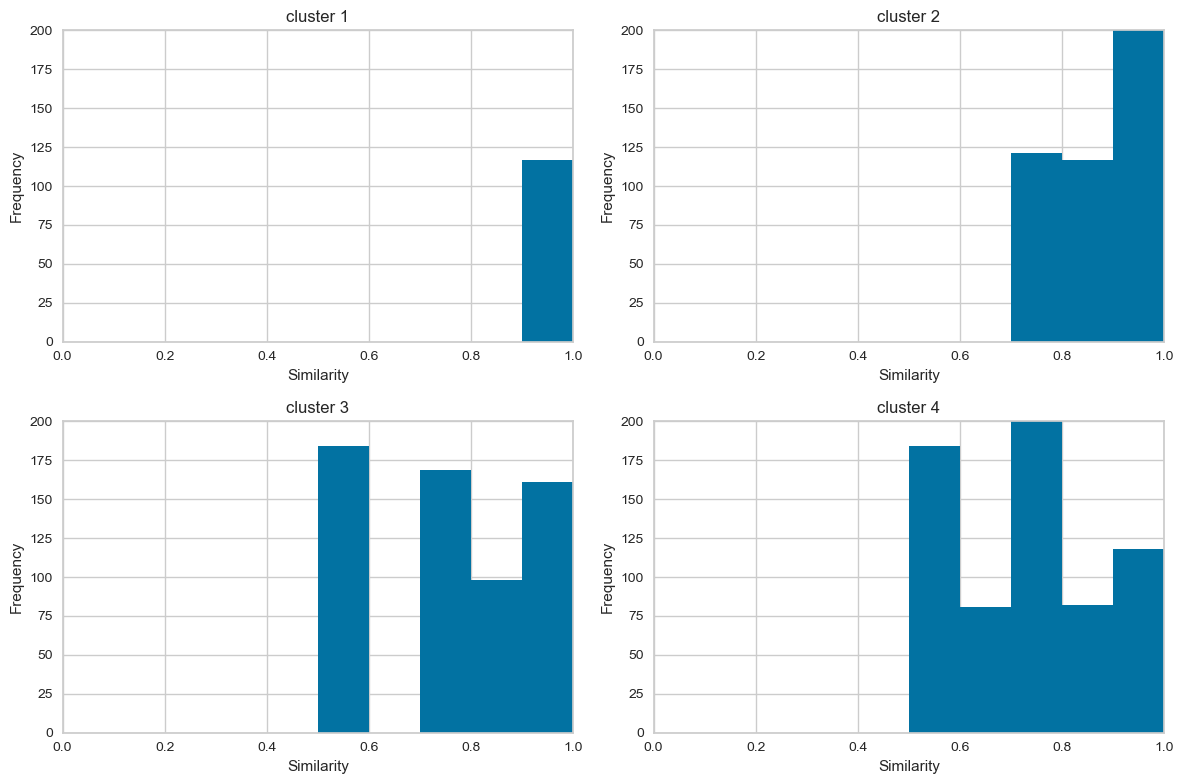

In [39]:
# Define the range of values for the x-axis (Similarity) in the histograms.
range_values = (0, 1)
# Define the number of bins to use for the histograms.
num_bins = 10
# Define the maximum frequency to set the y-axis limit for the histograms.
max_frequency = 200
# Create a figure with 2 rows and 2 columns of subplots (total 4 subplots) with a size of 12 inches (width) by 8 inches (height).
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Iterate over each number of clusters (1 to 4) to plot histograms for cluster similarities.
for i in range(1,5):
    # Ensure the feature names match those used during fitting
    features = data_km28[str(i)].feature_names_in_
    # Select only the columns that were used during fitting
    data_filtered = data[features]
    # Get the cluster labels for the current number of clusters.
    labels = data_km28[str(i)].predict(data_filtered)
    # Calculate the similarities between data points and cluster centers for the current number of clusters.
    similarities = data_km28[str(i)].transform(data_filtered).min(axis=1)
    # Calculate the row and column indices for the current subplot based on the loop index 'i'.
    row = (i - 1) // 2
    col = (i - 1) % 2

    # Create a histogram for the similarities and plot it on the current subplot.
    axs[row, col].hist(similarities, bins=num_bins, range=range_values)

    # Set the x-axis label for the current subplot.
    axs[row, col].set_xlabel('Similarity')

    # Set the y-axis label for the current subplot.
    axs[row, col].set_ylabel('Frequency')

    # Set the title for the current subplot with the cluster number.
    axs[row, col].set_title('cluster {}'.format(i))

    # Set the x-axis and y-axis limits for the current subplot.
    axs[row, col].set_xlim(range_values)
    axs[row, col].set_ylim(0, max_frequency)

    # Set the x-axis tick positions for the current subplot.
    axs[row, col].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])

# Adjust the layout to prevent overlapping of subplots and improve visual appearance.
plt.tight_layout()

# Display the figure with all subplots (histograms).
plt.show()

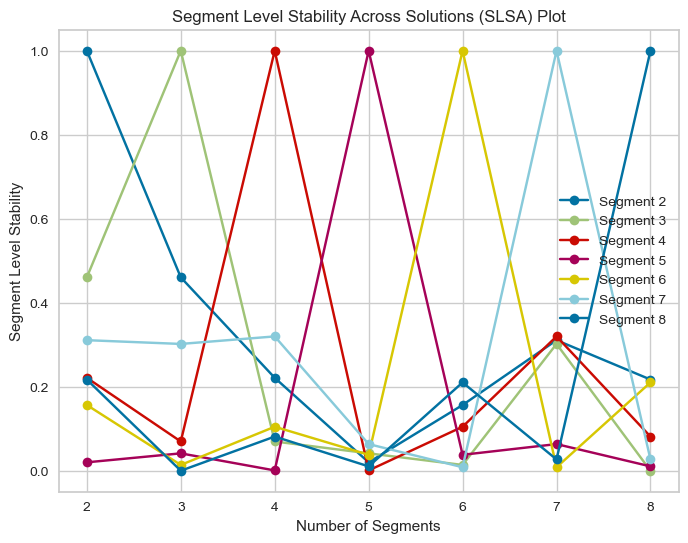

In [41]:
# Define the range of the number of clusters to test (from 2 to 8, excluding 9).
num_segments = range(2, 9)

# Create an empty list to store the cluster labels for different numbers of clusters (2 to 8).
segment_stability = []

# Iterate over each number of clusters (2 to 8) to calculate cluster labels and store them in 'segment_stability'.
for segment in range(2, 9):
    # Get the cluster labels for the current number of clusters.
    labels_segment = data_km28[str(segment)].predict(data_filtered)
    # Append the cluster labels to the 'segment_stability' list.
    segment_stability.append(labels_segment)

# Create a figure with size 8 inches (width) by 6 inches (height) to plot the SLSA (Segment Level Stability Across Solutions) plot.
plt.figure(figsize=(8, 6))

# Iterate over each number of clusters (2 to 8) to plot the SLSA plot for each segment.
for i, segment in enumerate(range(2, 9)):
    # Calculate the segment level stability (proportion of data points with consistent cluster labels across solutions).
    # For each number of clusters, calculate the mean of stability scores for all bootstrap solutions.
    # 'segment_stability[i] == labels' checks if the cluster labels for a particular bootstrap solution match the current segment's labels.
    segment_stability_mean = [np.mean(segment_stability[i] == labels) for labels in segment_stability]

    # Plot the SLSA plot using the 'num_segments' as the x-axis and the segment level stability as the y-axis.
    # Each line in the plot corresponds to a different segment (2 to 8).
    plt.plot(num_segments, segment_stability_mean, marker='o', label=f'Segment {segment}')

# Set the x-axis label for the SLSA plot.
plt.xlabel('Number of Segments')

# Set the y-axis label for the SLSA plot.
plt.ylabel('Segment Level Stability')

# Set the title for the SLSA plot.
plt.title('Segment Level Stability Across Solutions (SLSA) Plot')

# Set the x-axis tick positions for the SLSA plot.
plt.xticks(num_segments)

# Show the legend to identify each line in the SLSA plot.
plt.legend()

# Display grid lines in the SLSA plot to improve visual interpretation.
plt.grid(True)

# Display the SLSA plot.
plt.show()

   

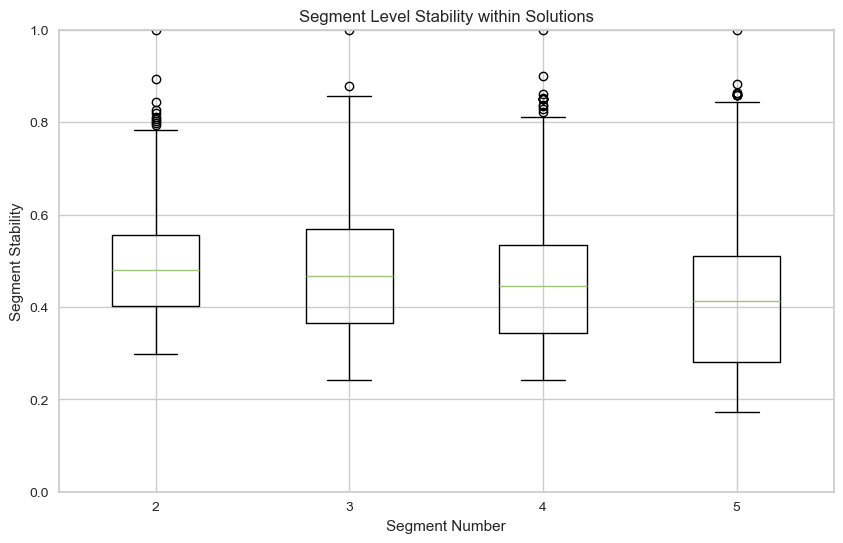

In [43]:
# Define a list of segment solutions to analyze (e.g., 2, 3, 4, and 5 clusters).
segment_solutions = ["2", "3", "4", "5"]

# Create dictionaries to store the cluster labels and similarities for each segment solution.
segment_labels = {}
segment_similarities = {}

# Iterate over each segment solution to calculate cluster labels and similarities.
for segment in segment_solutions:
    # Get the cluster labels for the current segment solution and store them in the 'segment_labels' dictionary.
    segment_labels[segment] = data_km28[segment].predict(data_filtered)

    # Calculate the similarities between data points and cluster centers for the current segment solution.
    # The 'transform' function returns the distances of each data point to the nearest cluster center.
    # The 'min' function computes the minimum distance across all cluster centers for each data point.
    segment_similarities[segment] = data_km28[segment].transform(data_filtered).min(axis=1)

# Create a list to store the normalized segment stability values for each segment solution.
segment_stability_values = []

# Iterate over each segment solution to calculate and normalize segment stability values.
for segment in segment_solutions:
    # Get the similarities for the current segment solution.
    similarities = segment_similarities[segment]

    # Normalize the similarities to be within the range [0, 1].
    # Dividing each similarity value by the maximum similarity ensures all values are scaled to the [0, 1] range.
    normalized_similarities = similarities / np.max(similarities)

    # Append the normalized segment stability values to the 'segment_stability_values' list.
    segment_stability_values.append(normalized_similarities)

# Create a boxplot of the normalized segment stability values for each segment solution.
# The boxplot visualizes the distribution and variation of segment stability within each solution.
plt.figure(figsize=(10, 6))
plt.boxplot(segment_stability_values, whis=1.5)

# Set the x-axis label for the boxplot to indicate the segment numbers (2, 3, 4, 5).
plt.xlabel("Segment Number")

# Set the y-axis label for the boxplot to indicate segment stability.
plt.ylabel("Segment Stability")

# Set the x-axis tick positions for the boxplot and label them with the segment solution numbers (2, 3, 4, 5).
plt.xticks(range(1, len(segment_solutions) + 1), segment_solutions)

# Set the y-axis limit to [0, 1] to ensure the stability values are within the visible range.
plt.ylim(0, 1)

# Set the title for the boxplot to describe the visualization.
plt.title("Segment Level Stability within Solutions")

# Display the boxplot.
plt.show()

In [45]:
# Import the 'entropy' function from the 'scipy.stats' module.
# The 'entropy' function is used to calculate the entropy of a probability distribution.
from scipy.stats import entropy

# Set a seed value to make the random number generation reproducible.
# This ensures that the same random numbers are generated every time the code is run with the same seed.
np.random.seed(1234)

# Define the range of the number of clusters to test (from 2 to 8, excluding 9).
k_values = range(2, 9)

# Create an empty list to store the results for different numbers of clusters.
# The results include various clustering evaluation metrics for each number of clusters.
data_m28 = []

# Iterate over each number of clusters (2 to 8) to perform KMeans clustering and calculate evaluation metrics.
for k in k_values:
    # Create a KMeans model with 'k' clusters and a fixed random seed for reproducibility.
    model = KMeans(n_clusters=k, random_state=1234)

    # Fit the KMeans model on the original data 'data'.
    model.fit(data.values)

    # Get the number of iterations required for the model to converge.
    iter_val = model.n_iter_

    # Check if the model has converged (reached a stable solution).
    # In the KMeans algorithm, convergence means that the cluster assignments do not change in consecutive iterations.
    converged = True

    # Store the current number of clusters ('k') and an extra variable 'k0_val'.
    # The purpose of 'k0_val' is not explicitly clear in the code.
    k_val = k
    k0_val = k

    # Calculate the log-likelihood of the data under the clustering model.
    log_likelihood = -model.inertia_

    # Get the number of samples (data points) and features in the 'MD' DataFrame.
    n_samples, _ = data.shape

    # Calculate the Akaike Information Criterion (AIC) for model evaluation.
    aic = -2 * log_likelihood + 2 * k

    # Calculate the Bayesian Information Criterion (BIC) for model evaluation.
    # The BIC penalizes complex models by taking into account both the likelihood and the number of parameters (k).
    bic = -2 * log_likelihood + np.log(n_samples) * k

    # Get the cluster labels for the data points based on the clustering model.
    labels = model.labels_

    # Calculate the proportion of data points in each cluster and store it as 'probs'.
    counts = np.bincount(labels)
    probs = counts / float(counts.sum())

    # Calculate the entropy of the cluster assignments to measure cluster purity.
    class_entropy = entropy(probs)

    # Calculate the Integrated Complete Likelihood (ICL) for model selection.
    # The ICL is obtained by subtracting the class entropy from the BIC.
    icl = bic - class_entropy

    # Append the evaluation metrics for the current number of clusters to the 'MD_m28' list.
    data_m28.append((iter_val, converged, k_val, k0_val, log_likelihood, aic, bic, icl))

# Convert the list of evaluation metrics into a pandas DataFrame for easy tabular representation.
data_m28 = pd.DataFrame(data_m28, columns=['iter', 'converged', 'k', 'k0', 'logLik', 'AIC', 'BIC', 'ICL'])

# Print the DataFrame containing the evaluation metrics for different numbers of clusters.
print(data_m28)

   iter  converged  k  k0       logLik          AIC          BIC          ICL
0    10       True  2   2 -2146.062044  4296.124088  4306.686859  4306.015908
1     5       True  3   3 -1896.330266  3798.660532  3814.504689  3813.529671
2     9       True  4   4 -1603.913802  3215.827604  3236.953147  3235.627738
3     9       True  5   5 -1502.697153  3015.394306  3041.801234  3040.267284
4     7       True  6   6 -1348.665399  2709.330799  2741.019113  2739.277954
5    10       True  7   7 -1249.233890  2512.467780  2549.437480  2547.530062
6     9       True  8   8 -1203.646165  2423.292330  2465.543415  2463.533662


Applying the Elbow Method

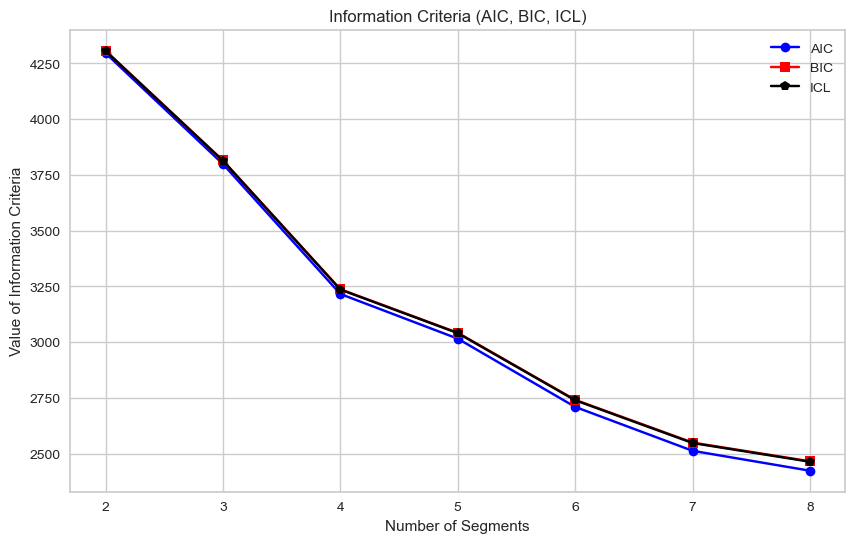

In [47]:
# Extract the 'k' values (number of clusters) from the 'data_m28' DataFrame.
num_segments = data_m28["k"]

# Extract the AIC (Akaike Information Criterion) values from the 'data_m28' DataFrame.
AIC_values = data_m28["AIC"]

# Extract the BIC (Bayesian Information Criterion) values from the 'data_m28' DataFrame.
BIC_values = data_m28["BIC"]

# Extract the ICL (Integrated Complete Likelihood) values from the 'data_m28' DataFrame.
ICL_values = data_m28["ICL"]

# Create a plot showing the values of different information criteria (AIC, BIC, ICL) for each number of clusters.
plt.figure(figsize=(10, 6))  # Width: 10 inches, Height: 6 inches
plt.plot(num_segments, AIC_values, marker='o', color='blue', label='AIC')
plt.plot(num_segments, BIC_values, marker='s', color='red', label='BIC')
plt.plot(num_segments, ICL_values, marker='p', color='black', label='ICL')

# Set the x-axis label for the plot to indicate the number of segments (number of clusters).
plt.xlabel('Number of Segments')

# Set the y-axis label for the plot to indicate the values of information criteria.
plt.ylabel('Value of Information Criteria')

# Set the title for the plot to describe the visualization.
plt.title('Information Criteria (AIC, BIC, ICL)')

# Display a legend to identify the information criteria (AIC, BIC, ICL) in the plot.
plt.legend()

# Display grid lines in the plot to improve visual interpretation.
plt.grid(True)

# Show the plot with information criteria values for different numbers of clusters.
plt.show()

In [49]:
# Import GaussianMixture from the 'sklearn.mixture' module.
# GaussianMixture is a probabilistic model for clustering using the Expectation-Maximization algorithm.
from sklearn.mixture import GaussianMixture

# Set the number of clusters to 4 for both KMeans and Gaussian Mixture models.
k = 4

# Create a KMeans model with 4 clusters using a fixed random seed for reproducibility.
kmeans = KMeans(n_clusters=k, random_state=1234)

# Fit the KMeans model on the original data 'data'.
kmeans.fit(data)

# Get the cluster assignments (labels) for the data points based on the KMeans model.
kmeans_clusters = kmeans.predict(data)

# Create a Gaussian Mixture model with 4 components (clusters) using a fixed random seed for reproducibility.
gmm = GaussianMixture(n_components=k, random_state=1234)

# Fit the Gaussian Mixture model on the original data 'data'.
gmm.fit(data)

# Get the cluster assignments (labels) for the data points based on the Gaussian Mixture model.
gmm_clusters = gmm.predict(data)

# Create a DataFrame 'results' to store the cluster assignments from KMeans and Gaussian Mixture models.
results = pd.DataFrame({'kmeans': kmeans_clusters, 'mixture': gmm_clusters})

# Filter the original data 'MD' to include only the data points that belong to the 4th cluster according to the Gaussian Mixture model.
# Store this filtered data in 'data_m4'.
data_m4 = data[results['mixture'] == 3]

# Create a KMeans model with 4 clusters specifically for the filtered data 'MD_m4'.
k4_m4 = KMeans(n_clusters=k, random_state=1234)

# Fit the KMeans model on the filtered data 'data_m4'.
k4_m4.fit(data_m4)

# Get the cluster assignments (labels) for the data points in 'data_m4' based on the KMeans model.
k4_m4_clusters = k4_m4.predict(data_m4)

# Create a DataFrame 'results_m4' to store the cluster assignments from the KMeans model applied to 'data_m4'.
results_m4 = pd.DataFrame({'kmeans': k4_m4_clusters, 'mixture': 3})

# Print the cross-tabulation (contingency table) between the cluster assignments from KMeans and Gaussian Mixture models.
print(pd.crosstab(results['kmeans'], results['mixture']))

# Print the cross-tabulation (contingency table) between the cluster assignments from KMeans on 'data' and KMeans on 'data_m4'.
print(pd.crosstab(results['kmeans'], results_m4['kmeans']))

mixture    0    1    2    3
kmeans                     
0        546    0    1   33
1          0  213   11    4
2         46    3  265    8
3         29   38    0  256
kmeans   0   1   2   3
kmeans                
0       51  15  35  20
1       18   8  11  11
2       23   9  14  22
3       29   5  15  15


In [51]:
# Import GaussianMixture from the 'sklearn.mixture' module.
# GaussianMixture is a probabilistic model for clustering using the Expectation-Maximization algorithm.
from sklearn.mixture import GaussianMixture

# Create a Gaussian Mixture model with 4 components (clusters) for the original data 'data'.
gmm_m4a = GaussianMixture(n_components=4)

# Fit the Gaussian Mixture model on the original data 'data'.
gmm_m4a.fit(data)

# Calculate the log-likelihood of the original data 'data' under the Gaussian Mixture model.
# The log-likelihood represents the logarithm of the likelihood function, which measures how well the model fits the data.
# A higher log-likelihood indicates a better fit of the data to the model.
log_likelihood_m4a = gmm_m4a.score(data)

# Create another Gaussian Mixture model with 4 components (clusters) for the original data 'data'.
gmm_m4 = GaussianMixture(n_components=4)

# Fit the second Gaussian Mixture model on the original data 'data'.
gmm_m4.fit(data)

# Calculate the log-likelihood of the original data 'data' under the second Gaussian Mixture model.
log_likelihood_m4 = gmm_m4.score(data)

# Print the calculated log-likelihood values for the two Gaussian Mixture models.
print("Log-likelihood for data.m4a:", log_likelihood_m4a)
print("Log-likelihood for data.m4:", log_likelihood_m4)

Log-likelihood for data.m4a: 9.456781748071885
Log-likelihood for data.m4: 3.6427464011765815


In [53]:
# Calculate the value counts of the 'Like' column in the 'data1' DataFrame.
# The 'value_counts' function counts the occurrences of each unique value in the specified column.
like_counts = pd.value_counts(data1['Like'])
# Reverse the order of the value counts obtained for the 'Like' column.
# The 'iloc[::-1]' slicing is used to reverse the order of the counts.
reversed_counts = like_counts.iloc[::-1]
# Print the reversed value counts, which now display the counts in descending order of unique values.
print(reversed_counts)

Like
-1     58
-2     59
-4     71
-3     73
+5    143
-5    152
+1    152
+4    160
0     169
+2    187
+3    229
Name: count, dtype: int64


In [55]:
# Define a mapping of string values to numeric codes
like_mapping = {
    'I HATE IT!-5': -5,
     '-5': -5,
    '-4': -4,
    '-3': -3,
    '-2': -2,
    '-1': -1,
    '0': 0,
    '+1': 1,
    '+2': 2,
    '+3': 3,
    '+4': 4,
    '+5': 5,
    'I LOVE IT!+5': 5
}
# Create a new column 'Like.n' in the 'data' DataFrame using the 'map' function.
# The 'like_mapping' variable is assumed to contain a mapping (dictionary) that transforms the 'Like' column values.
# The 'map' function applies the mapping to each value in the 'Like' column and stores the result in the 'Like_n' column.
data1['Like_n'] = data1['Like'].map(like_mapping)
# Calculate the value counts of the newly created 'Like_n' column in the 'data' DataFrame.
# The 'value_counts' function counts the occurrences of each unique value in the specified column.
like_n_counts = data1['Like_n'].value_counts()
# Print the value counts of the 'Like_n' column, which shows the counts of each unique value in the column.
# The result helps in understanding the distribution of the transformed 'Like' column values after mapping.
print(like_n_counts)
     

Like_n
 3    229
 2    187
 0    169
 4    160
 1    152
-5    152
 5    143
-3     73
-4     71
-2     59
-1     58
Name: count, dtype: int64


In [57]:
# Import 'dmatrices' from the 'patsy' module.
# 'dmatrices' is used to create design matrices for statistical models, including linear regression.
from patsy import dmatrices

# Extract the names of independent variables from the 'data1' DataFrame.
# The first 11 columns (0 to 10) of the DataFrame are considered as independent variables.
independent_vars = data1.columns[0:11]

# Create a string representation of the formula for the linear regression model.
# The formula_str will contain the independent variables separated by '+', indicating their inclusion in the model.
formula_str = ' + '.join(independent_vars)

# Append the dependent variable 'Like' to the formula_str, specifying it as the response variable.
formula_str = 'Like ~ ' + formula_str

# Create design matrices for the linear regression model using the formula and 'data1'.
# The 'dmatrices' function parses the formula and constructs the matrices for the model.
# 'f' will be the design matrix for the dependent variable 'Like' (response variable).
f = dmatrices(formula_str, data=data1)[1]

# Print the design matrix 'f' for the dependent variable 'Like'.
# The design matrix is a matrix representation of the data that includes both the dependent variable and the independent variables.
# It is used in statistical modeling to prepare data for regression analysis.
print(f)

[[1. 0. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 1. 0. 0.]
 [1. 0. 1. ... 1. 1. 0.]
 ...
 [1. 1. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 0. 1. 0.]
 [1. 0. 1. ... 1. 0. 1.]]


In [59]:
# Import GaussianMixture from the 'sklearn.mixture' module.
# GaussianMixture is a probabilistic model for clustering using the Expectation-Maximization algorithm.
from sklearn.mixture import GaussianMixture

# Import dmatrix from the 'patsy' module.
# dmatrix is used to create design matrices for statistical models.
from patsy import dmatrix

# Set a fixed random seed for reproducibility.
np.random.seed(1234)

# Create a design matrix 'X' for the independent variables using 'dmatrix'.
# The 'f.design_info' is the design matrix from the previous code snippet representing the independent variables.
# 'data=data1' specifies that the data should be taken from the 'data1' DataFrame.
X = dmatrix(f.design_info, data=data1)

# Create a design matrix 'y' for the dependent variable 'Like' using 'dmatrix'.
# The formula 'Like' specifies that only the dependent variable should be considered in the matrix.
# The 'data=data1' specifies that the data should be taken from the 'data1' DataFrame.
y = dmatrix('Like', data=data1)

# Set the number of components for the Gaussian Mixture model.
n_components = 2

# Set the number of initializations for the Gaussian Mixture model.
n_init = 10

# Set the 'verbose' parameter for the Gaussian Mixture model (True to show progress, False otherwise).
verbose = False

# Set the number of repetitions for the model fitting.
n_rep = 10

# Create a Gaussian Mixture model with specified parameters.
model = GaussianMixture(n_components=n_components, n_init=n_init, verbose=verbose)

# Fit the Gaussian Mixture model on the design matrices 'X' and 'y'.
# This trains the model to identify clusters based on the data provided.
data_reg2 = model.fit(X, y)

# Print the trained Gaussian Mixture model.
# The model contains information about the clustering results and learned parameters.
print(data_reg2)

# Calculate the cluster sizes by counting the occurrences of each cluster label in the data.
cluster_sizes = np.bincount(model.predict(X))

# Print the cluster sizes, i.e., the number of data points assigned to each cluster.
# The cluster sizes give an idea of the distribution of data points among different clusters.
print("Cluster sizes:")
for i, size in enumerate(cluster_sizes):
    print(f"{i+1}: {size}")

GaussianMixture(n_components=2, n_init=10, verbose=False)
Cluster sizes:
1: 985
2: 468


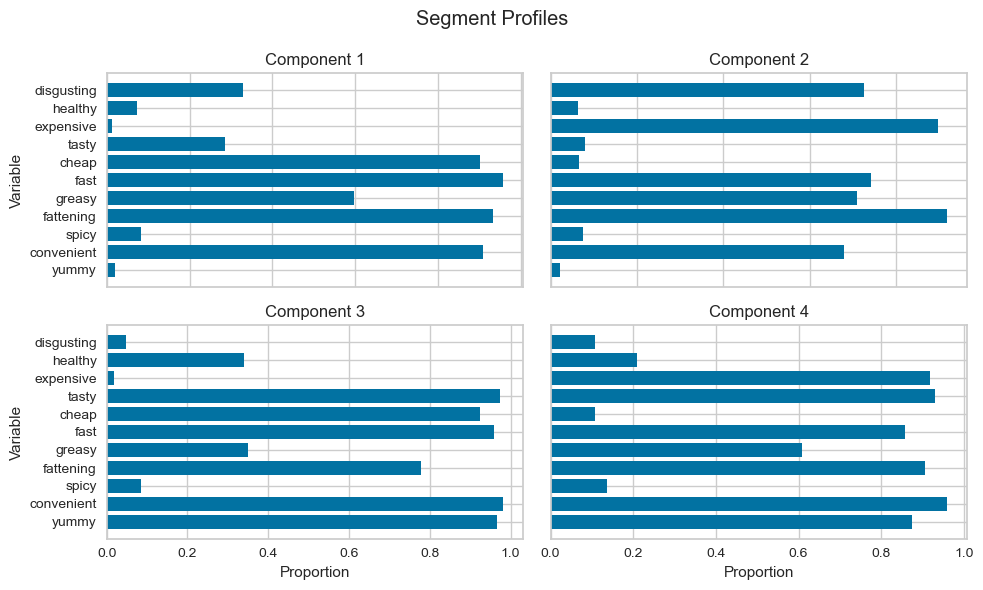

In [61]:
# Get the KMeans model with 4 clusters from 'data_km28'.
kmeans = data_km28['4']

# Get the cluster labels assigned by KMeans to each data point.
labels = kmeans.labels_

# Group the data 'data' by the cluster labels and calculate the mean of each variable for each cluster.
# This results in a DataFrame 'data_mean' containing the mean values of each variable for each cluster.
data_mean = data.groupby(labels).mean()

# Create a 2x2 grid of subplots with the given figure size.
fig, axs = plt.subplots(2, 2, figsize=(10, 6))

# Plot the horizontal bar chart for Component 1 in the first subplot.
axs[0, 0].barh(range(data_mean.shape[1]), data_mean.iloc[0])
axs[0, 0].set_title('Component 1')

# Plot the horizontal bar chart for Component 2 in the second subplot.
axs[0, 1].barh(range(data_mean.shape[1]), data_mean.iloc[1])
axs[0, 1].set_title('Component 2')

# Plot the horizontal bar chart for Component 3 in the third subplot.
axs[1, 0].barh(range(data_mean.shape[1]), data_mean.iloc[2])
axs[1, 0].set_title('Component 3')

# Plot the horizontal bar chart for Component 4 in the fourth subplot.
axs[1, 1].barh(range(data_mean.shape[1]), data_mean.iloc[3])
axs[1, 1].set_title('Component 4')

# Set common labels for y-axis ('Variable') and x-axis ('Proportion') for all subplots.
for ax in axs.flat:
    ax.set(ylabel='Variable', xlabel='Proportion')
    ax.set_yticks(range(data_mean.shape[1]))
    ax.set_yticklabels(data.columns)

# Hide labels and ticks on the shared x- and y-axes for the inner subplots.
for ax in axs.flat:
    ax.label_outer()

# Add a title to the entire figure.
fig.suptitle('Segment Profiles')

# Adjust the layout of subplots to avoid overlapping and make the figure tidy.
fig.tight_layout()

# Display the plot.
plt.show()

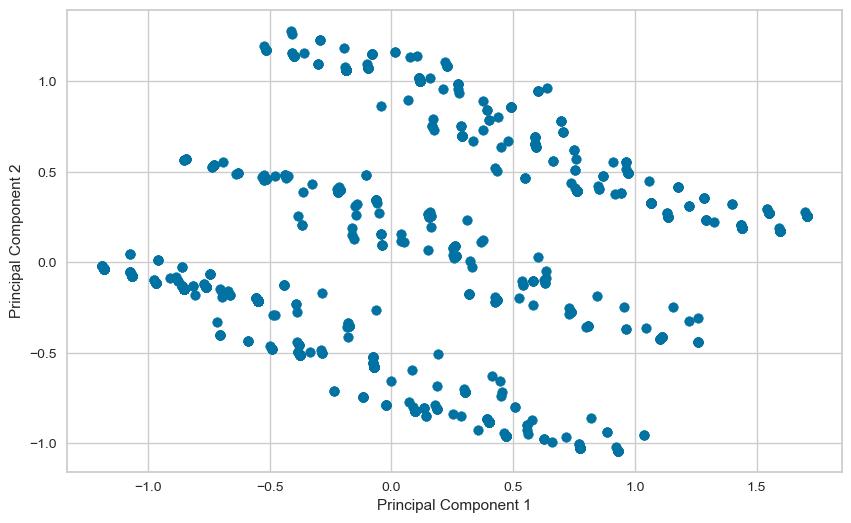

In [63]:
# Create a KMeans clustering model with 4 clusters.
# 'n_clusters=4' specifies that the data should be grouped into 4 clusters.
kmeans = KMeans(n_clusters=4)

# Fit the KMeans model on the data 'data'.
# The 'fit' function identifies the cluster centers and assigns data points to their respective clusters.
kmeans.fit(data)

# Create a PCA model with 2 principal components.
# 'n_components=2' specifies that the data should be transformed into a 2-dimensional space.
pca = PCA(n_components=2)

# Transform the data 'MD' using PCA to get the 2 principal components.
# 'data_pca' will be a 2-dimensional array representing the data in the reduced space.
data_pca = pca.fit_transform(data)

# Create a new figure and axis for the scatter plot.

fig, ax = plt.subplots(figsize=(10, 6))
# Plot the scatter plot of the data points using the first and second principal components.
# 'data_pca[:, 0]' represents the first principal component on the x-axis.
# 'data_pca[:, 1]' represents the second principal component on the y-axis.
ax.scatter(data_pca[:, 0], data_pca[:, 1])

# Set the labels for the x-axis and y-axis.
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')

# Display the plot.
plt.show()

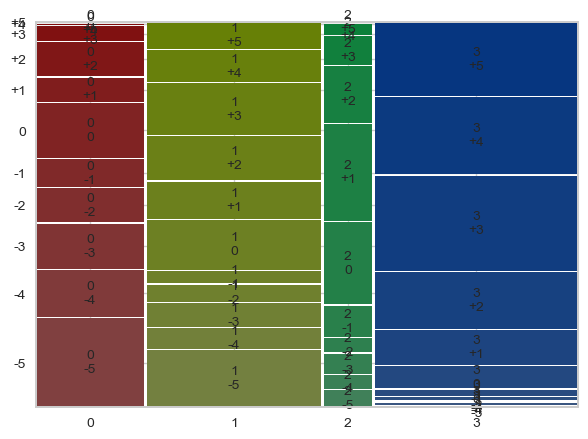

In [65]:
# Define a function 'labelling' to perform label encoding for categorical variables in the DataFrame 'data1'.
# The function takes a categorical column 'x' as input, applies label encoding, and updates the DataFrame.
def labelling(x):
    data1[x] = LabelEncoder().fit_transform(data1[x])
    return data1

# List of categorical columns to be label encoded.
cat = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']

# Loop through each categorical column and apply label encoding using the 'labelling' function.
for i in cat:
    labelling(i)

# Create a DataFrame 'df_eleven' containing only the label encoded categorical columns.
df_eleven = data1.loc[:, cat]


# Create a KMeans clustering model with 4 clusters on the label encoded categorical columns.
# 'init='k-means++'' uses the k-means++ initialization method for better convergence.
# 'random_state=0' sets the random seed for reproducibility.
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(data)

# Add a new column 'cluster_num' to 'data1' to store the cluster labels assigned by KMeans.
data['cluster_num'] = kmeans.labels_

# Create a contingency table (crosstab) showing the frequency distribution of 'Like' and 'cluster_num'.
crosstab = pd.crosstab(data['cluster_num'], data1['Like'])

# Reorder the columns in the crosstab based on the 'Like' categories for better visualization.
# This ensures the 'Like' categories appear in a specific order in the mosaic plot.
crosstab = crosstab[['-5', '-4', '-3', '-2', '-1', '0', '+1', '+2', '+3', '+4', '+5']]

# Set the figure size for the mosaic plot.
plt.rcParams['figure.figsize'] = (7, 5)

# Create and display the mosaic plot using the 'mosaic' function.
mosaic(crosstab.stack())
plt.show()

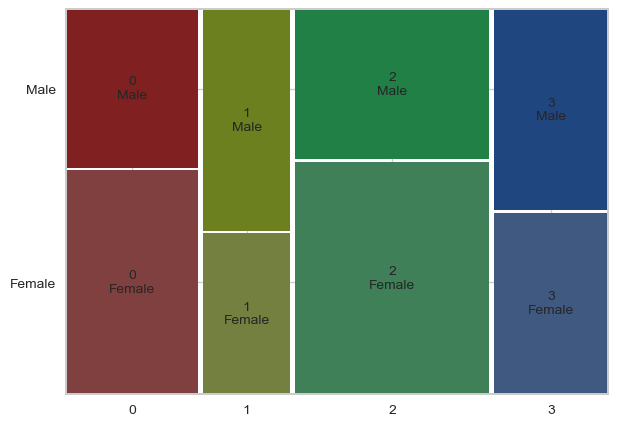

In [67]:
# Import the 'mosaic' function from 'statsmodels.graphics.mosaicplot' for mosaic plots.
from statsmodels.graphics.mosaicplot import mosaic

# Get the KMeans model with 4 clusters from 'MD_km28'.
data_k4 = data_km28['4']

# Get the cluster labels assigned by KMeans to each data point.
k4 = data_k4.labels_

# Create a contingency table (crosstab) showing the frequency distribution of 'Gender' and 'k4'.
# The crosstab counts the occurrences of each unique combination of 'Gender' and 'k4'.
ct = pd.crosstab(k4, data1['Gender'])

# Create a mosaic plot to visualize the relationship between 'Gender' and 'k4'.
# The 'gap=0.01' parameter sets the gap between tiles in the mosaic plot for better visualization.
mosaic(ct.stack(), gap=0.01)

# Display the mosaic plot.
plt.show()

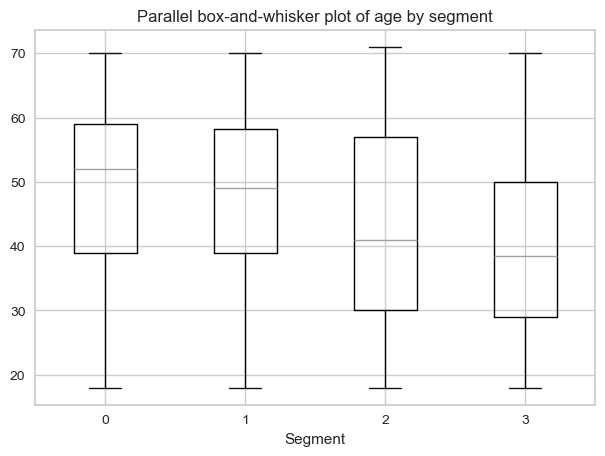

In [69]:
# Create a DataFrame 'df' containing two columns: 'Segment' (cluster labels 'k4') and 'Age' from the 'data1' DataFrame.
df = pd.DataFrame({'Segment': k4, 'Age': data1['Age']})

# Create a box-and-whisker plot (boxplot) to compare the distribution of 'Age' across different segments.
# The 'by='Segment'' parameter groups the data by the 'Segment' column for separate boxplots for each segment.
# The 'column='Age'' parameter specifies the 'Age' column to plot in the boxplots.
df.boxplot(by='Segment', column='Age')

# Set the title for the plot.
plt.title('Parallel box-and-whisker plot of age by segment')

# Remove the default title added by 'by='Segment''.
plt.suptitle('')

# Display the boxplot.
plt.show()

In [79]:
# Label encode the 'VisitFrequency' column in the 'data1' DataFrame.
# The 'LabelEncoder()' is used to transform the 'VisitFrequency' values into numeric labels.
data['VisitFrequency'] = LabelEncoder().fit_transform(data1['VisitFrequency'])

# Group the data in 'data2' by 'cluster_num' and calculate the mean of 'VisitFrequency' for each cluster.
# The result is a Series 'visit' with the mean 'VisitFrequency' for each cluster.
visit = data.groupby('cluster_num')['VisitFrequency'].mean()

# Convert the 'visit' Series to a DataFrame and reset the index.
# This step is done to convert the 'visit' Series into a DataFrame with 'cluster_num' and 'VisitFrequency' columns.
visit = visit.to_frame().reset_index()

# The 'visit' DataFrame now contains the mean 'VisitFrequency' for each cluster ('cluster_num').
# It shows the average visit frequency for customers belonging to each identified segment or cluster.
visit

,cluster_num,VisitFrequency
0,0,2.787162
1,1,2.596195
2,2,2.618321
3,3,2.598553


In [81]:
# Label encode the 'Like' column in the 'data1' DataFrame.
# The 'LabelEncoder()' is used to transform the 'Like' values into numeric labels.
data['Like'] = LabelEncoder().fit_transform(data1['Like'])

# Group the data in 'data1' by 'cluster_num' and calculate the mean of 'Like' for each cluster.
# The result is a Series 'Like' with the mean 'Like' value for each cluster.
Like = data.groupby('cluster_num')['Like'].mean()

# Convert the 'Like' Series to a DataFrame and reset the index.
# This step is done to convert the 'Like' Series into a DataFrame with 'cluster_num' and 'Like' columns.
Like = Like.to_frame().reset_index()

# The 'Like' DataFrame now contains the mean 'Like' value for each cluster ('cluster_num').
# It shows the average 'Like' response (encoded as numeric labels) for customers belonging to each identified segment or cluster.
Like

,cluster_num,Like
0,0,6.597973
1,1,4.991543
2,2,4.351145
3,3,2.882459


In [83]:
# Label encode the 'Gender' column in the 'data1' DataFrame.
# The 'LabelEncoder()' is used to transform the 'Gender' values into numeric labels.
data['Gender'] = LabelEncoder().fit_transform(data1['Gender'])

# Group the data in 'data1' by 'cluster_num' and calculate the mean of 'Gender' for each cluster.
# The result is a Series 'Gender' with the mean 'Gender' value for each cluster.
Gender = data.groupby('cluster_num')['Gender'].mean()

# Convert the 'Gender' Series to a DataFrame and reset the index.
# This step is done to convert the 'Gender' Series into a DataFrame with 'cluster_num' and 'Gender' columns.
Gender = Gender.to_frame().reset_index()

# The 'Gender' DataFrame now contains the mean 'Gender' value for each cluster ('cluster_num').
# It shows the average gender representation (encoded as numeric labels) for customers belonging to each identified segment or cluster.
# The gender representation is typically encoded as 0 for one gender and 1 for the other gender (if the gender is binary).
# The DataFrame can provide insights into the gender distribution among different clusters.
Gender

,cluster_num,Gender
0,0,0.432432
1,1,0.547569
2,2,0.427481
3,3,0.401447


   cluster_num    Gender      Like  VisitFrequency
0            0  0.432432  6.597973        2.787162
1            1  0.547569  4.991543        2.596195
2            2  0.427481  4.351145        2.618321
3            3  0.401447  2.882459        2.598553


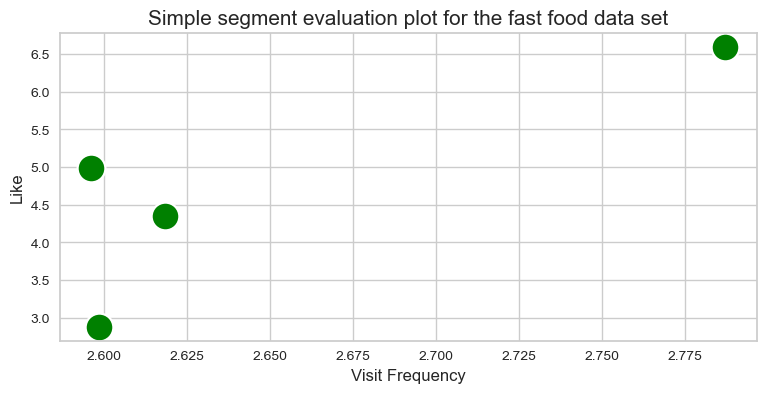

In [93]:

# Merge the 'Gender', 'Like', and 'VisitFrequency' DataFrames on 'cluster_num'.
# The 'merge' function combines the DataFrames based on the common column 'cluster_num'.
# The 'left' join method keeps all rows from the 'Gender' DataFrame and merges matching rows from the 'Like' and 'visit' DataFrames.
segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')

# Display the 'segment' DataFrame after merging.
print(segment)

# Create a new figure with size (9, 4) for the scatter plot.
plt.figure(figsize=(9, 4))

# Create a scatter plot to visualize the relationship between 'VisitFrequency' and 'Like'.
# 'x = "VisitFrequency"' specifies the 'VisitFrequency' column for the x-axis.
# 'y = "Like"' specifies the 'Like' column for the y-axis.
# 'data=segment' specifies the DataFrame 'segment' containing the data to be plotted.
# 's=400' sets the size of the markers in the scatter plot to 400.
# 'color="r"' sets the color of the markers to red.
sns.scatterplot(x="VisitFrequency", y="Like", data=segment, s=400, color='green')

# Set the title for the plot.
plt.title("Simple segment evaluation plot for the fast food data set", fontsize=15)

# Set the label for the x-axis.
plt.xlabel("Visit Frequency", fontsize=12)

# Set the label for the y-axis.
plt.ylabel("Like", fontsize=12)

# Display the plot.
plt.show()
